In [78]:
import pandas as pd 
datos = pd.read_excel("../database/datitos.XlsX");
X=datos.iloc[:, [13,14]]
X['Latitud']


0      21.151996
1      21.151996
2      21.153231
3      21.168311
4      21.109539
         ...    
134    21.127585
135    21.181419
136    21.127585
137    21.154248
138    21.127585
Name: Latitud, Length: 139, dtype: float64

In [99]:
import random
for i in range(138):
    X['Latitud'][i]=(X['Latitud'][i]-random.uniform(0.01000, 0.00010))
    X['Longitud'][i]=(X['Longitud'][i]-random.uniform(0.01000, 0.00010))
X


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [101]:
X=X.values
X

array([[-101.71225387,   21.1487485 ],
       [-101.71497014,   21.14805471],
       [-101.68333427,   21.14569964],
       [-101.67304799,   21.1530943 ],
       [-101.64457808,   21.10155432],
       [-101.67591917,   21.16636836],
       [-101.65516144,   21.15069123],
       [-101.71673729,   21.13562543],
       [-101.71986576,   21.14509787],
       [-101.7148095 ,   21.13759173],
       [-101.57344854,   21.04887375],
       [-101.67146534,   21.16553672],
       [-101.65915861,   21.16198887],
       [-101.6588374 ,   21.16294113],
       [-101.65639062,   21.08585724],
       [-101.66143834,   21.16119459],
       [-101.6813262 ,   21.14401804],
       [-101.64524568,   21.08459284],
       [-101.72233294,   21.14191255],
       [-101.57642013,   21.05140336],
       [-101.6701144 ,   21.15801516],
       [-101.67492381,   21.15337815],
       [-101.63329391,   21.07058574],
       [-101.74889668,   21.15267679],
       [-101.66475962,   21.14998935],
       [-101.75378766,   

In [80]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 45)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Parámetro Inercia

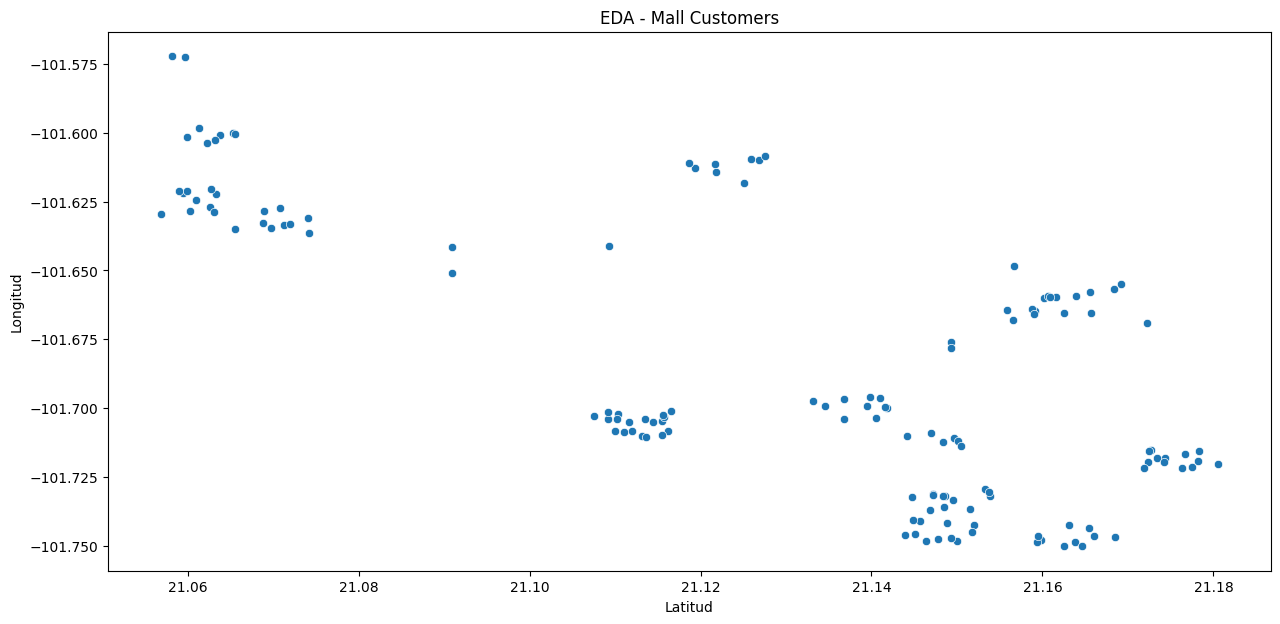

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.scatterplot(data=X, x='Latitud',y='Longitud')
plt.title('EDA - Mall Customers')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

In [84]:
X

,Longitud,Latitud
0,-101.710792,21.149636
1,-101.712067,21.148315
2,-101.675810,21.149246
3,-101.664815,21.159143
4,-101.641151,21.109334
...,...,...
134,-101.618414,21.125112
135,-101.719465,21.174247
136,-101.611339,21.121743
137,-101.731494,21.147189


In [97]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 45)

train_km = kmeans.fit_predict(X)
# imprimir al cluster al que pertenece cada punto
X


,Longitud,Latitud
0,-101.710792,21.149636
1,-101.712067,21.148315
2,-101.675810,21.149246
3,-101.664815,21.159143
4,-101.641151,21.109334
...,...,...
134,-101.618414,21.125112
135,-101.719465,21.174247
136,-101.611339,21.121743
137,-101.731494,21.147189


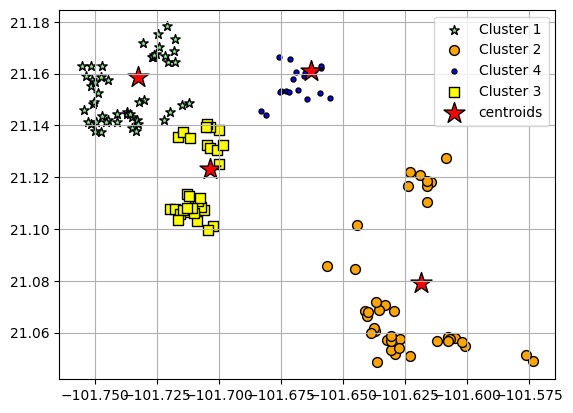

In [102]:
plt.scatter(
    X[train_km == 0,0], X[train_km == 0,1],
    s =50, c = "lightgreen",
    marker= '*', edgecolor= 'black', label = 'Cluster 1'
)
plt.scatter(
    X[train_km == 1,0], X[train_km == 1,1],
    s =50, c = "orange",
    marker= 'o', edgecolor= 'black', label = 'Cluster 2'
)
plt.scatter(
    X[train_km == 2,0], X[train_km == 2,1],
    s =50, c = "blue",
    marker= '.', edgecolor= 'black', label = 'Cluster 4'
)
plt.scatter(
    X[train_km == 3,0], X[train_km == 3,1],
    s =50, c = "yellow",
    marker= 's', edgecolor= 'black', label = 'Cluster 3'
)

plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s = 250, marker = '*',
    c = 'red', edgecolor= 'black',
    label = 'centroids'                                               
)

plt.legend()
plt.grid()
plt.show()
